# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
#!pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | tsiombe
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | tamanrasset
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | cuero
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | rio grande
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | verkhnevilyuysk
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | susuman
Processing Record 18 of Set 1 | santana
Processing Record 19 of Set 1 | alotau
Processing Record 20 of Set 1 | dori
Processing Record 21 of Set 1 | ngambe
Processing Record 22 of Set 1 | grytviken
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [8]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.05,92,100,4.02,NZ,1720840808
1,tsiombe,-25.3000,45.4833,288.68,62,0,1.07,MG,1720840809
2,anadyr,64.7500,177.4833,290.43,51,40,7.00,RU,1720840811
3,tamanrasset,22.7850,5.5228,302.10,16,0,3.60,DZ,1720840813
4,edinburgh of the seven seas,-37.0676,-12.3116,285.36,68,99,15.85,SH,1720840814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

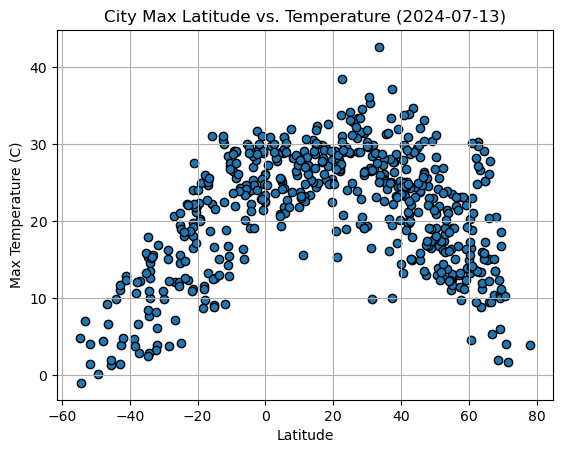

In [3]:
# Build scatter plot for latitude vs. temperature
import datetime
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'] - 273.15,
            edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

date = datetime.datetime.utcfromtimestamp(int(city_data_df['Date'].min()))
plt.title(f'City Max Latitude vs. Temperature ({date.strftime("%Y-%m-%d")})')

# Incorporate the other graph properties
# Add gridlines
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

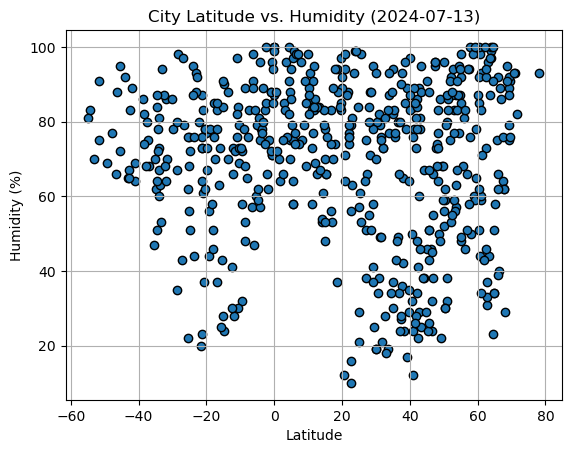

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'],# - 273.15,
            edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title(f'City Latitude vs. Humidity ({date.strftime("%Y-%m-%d")})')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

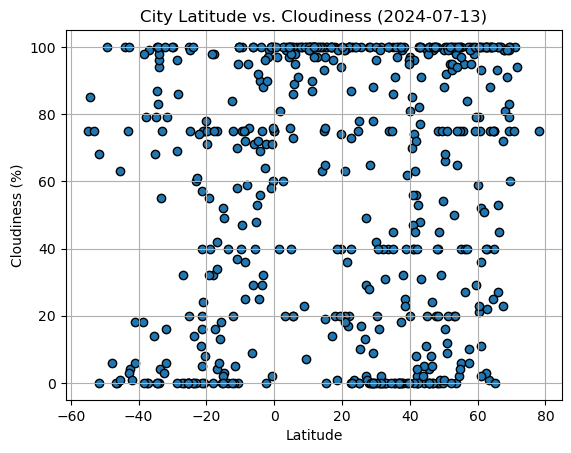

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'],
            edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.title(f'City Latitude vs. Cloudiness ({date.strftime("%Y-%m-%d")})')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

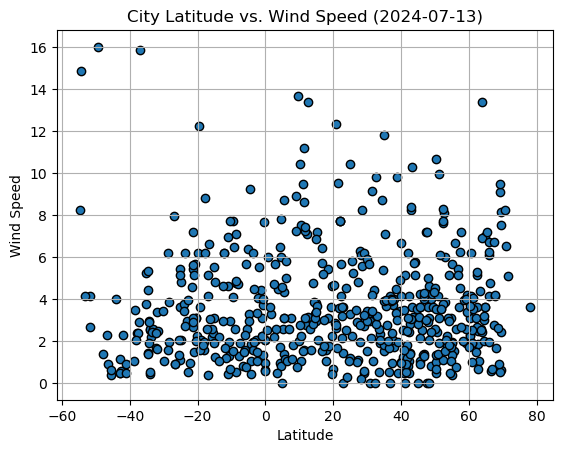

In [41]:
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'],# - 273.15,
            edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.title(f'City Latitude vs. Wind Speed ({date.strftime("%Y-%m-%d")})')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [175]:
# Define a function to create Linear Regression plots
from scipy import stats
from scipy.stats import gaussian_kde

def plot_linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    regression_line = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red')

    # Create the equation of the line string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Calculate point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Define a grid to evaluate density
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = gaussian_kde(xy)(np.vstack([xi.flatten(), yi.flatten()]))

   # Reshape zi to match the grid shape
    zi = zi.reshape(xi.shape)

   # Find the coordinates of the maximum whitespace
    min_density_index = np.unravel_index(np.argmin(zi), zi.shape)
   # Adjust the position a bit to avoid overlapping with points
    low_density_x = xi[min_density_index] 
    low_density_y = yi[min_density_index] 

    # Normalize the coordinates to be percentages of the plot dimensions
    ax = plt.gca()
    low_density_x_rel = (low_density_x - ax.get_xlim()[0]) / (ax.get_xlim()[1] - ax.get_xlim()[0])
    low_density_y_rel = (low_density_y - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])

    horizontal_alignment = 'left' if low_density_x_rel <= 0.6 else 'right'
    # Add the text to the plot at the low density location
    plt.text(low_density_x_rel, low_density_y_rel, line_eq, fontsize=14, color='red',weight='bold', transform=ax.transAxes, ha=horizontal_alignment)


    # Find the point with the lowest density
    #min_density_index = np.argmin(z)
    #low_density_x = x.iloc[min_density_index]
    #print(x[low_density_x])
    print(len(x))
    print(min_density_index)
    print(low_density_x)
    print(x.index)
   
    #low_density_y = y.iloc[min_density_index]



    # Add the text to the plot at the low density location
    #plt.text(low_density_x,low_density_y, line_eq, fontsize=14, color='red')#bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

 #   plt.text(5, 5*slope, line_eq, fontsize=14, color='red', weight='bold',transform=plt.gca().transAxes)
    
    plt.show()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,290.43,51,40,7.00,RU,1720840811
3,tamanrasset,22.7850,5.5228,302.10,16,0,3.60,DZ,1720840813
5,cuero,29.0939,-97.2892,299.08,95,78,2.73,US,1720840816
6,nemuro,43.3236,145.5750,288.07,95,91,3.61,JP,1720840817
8,longyearbyen,78.2186,15.6401,277.06,93,75,3.60,SJ,1720840820


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.05,92,100,4.02,NZ,1720840808
1,tsiombe,-25.3000,45.4833,288.68,62,0,1.07,MG,1720840809
4,edinburgh of the seven seas,-37.0676,-12.3116,285.36,68,99,15.85,SH,1720840814
7,mount gambier,-37.8333,140.7667,285.26,68,79,2.37,AU,1720840577
10,rio grande,-32.0350,-52.0986,277.01,86,16,3.39,BR,1720840823


###  Temperature vs. Latitude Linear Regression Plot

384
(0, 0)
0.0069
Index([  2,   3,   5,   6,   8,   9,  13,  14,  15,  16,
       ...
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556],
      dtype='int64', name='City_ID', length=384)


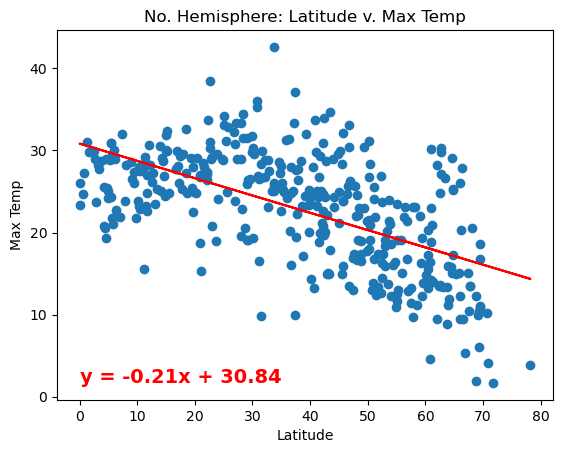

In [176]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere - Max Temperature
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Max Temp'] - 273.15
x_label_north = "Latitude"
y_label_north = "Max Temp"
title_north = "No. Hemisphere: Latitude v. Max Temp"

# Call the plot_linear_regression function for the Northern Hemisphere
plot_linear_regression(x_values_north, y_values_north, x_label_north, y_label_north, title_north)


174
(99, 0)
-54.8
Index([  0,   1,   4,   7,  10,  11,  12,  17,  18,  21,
       ...
       526, 527, 530, 534, 535, 538, 540, 543, 546, 557],
      dtype='int64', name='City_ID', length=174)


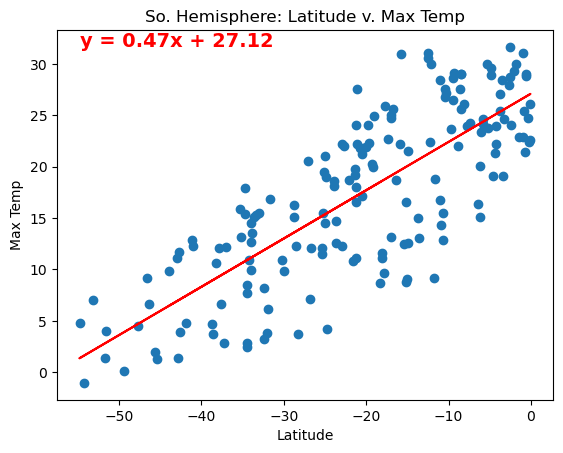

In [177]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere - Max Temperature
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Max Temp'] - 273.15
x_label_south = "Latitude"
y_label_south = "Max Temp"
title_south = "So. Hemisphere: Latitude v. Max Temp"

# Call the plot_linear_regression function for the Southern Hemisphere
plot_linear_regression(x_values_south, y_values_south, x_label_south, y_label_south, title_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

384
(0, 0)
0.0069
Index([  2,   3,   5,   6,   8,   9,  13,  14,  15,  16,
       ...
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556],
      dtype='int64', name='City_ID', length=384)


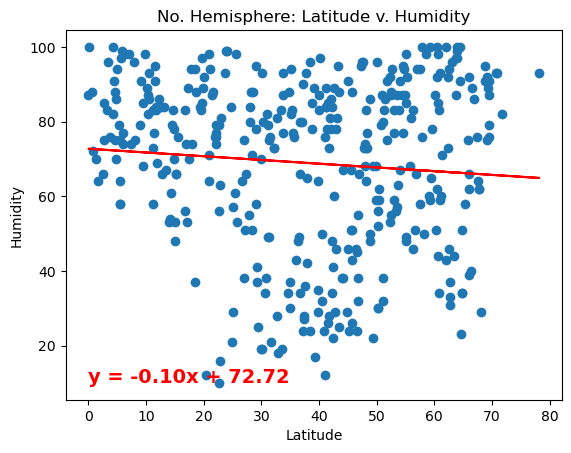

In [178]:
# Northern Hemisphere
# Northern Hemisphere - Humidity
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Humidity'] 
x_label_north = "Latitude"
y_label_north = "Humidity"
title_north = "No. Hemisphere: Latitude v. Humidity"

# Call the plot_linear_regression function for the Northern Hemisphere
plot_linear_regression(x_values_north, y_values_north, x_label_north, y_label_north, title_north)

174
(0, 0)
-54.8
Index([  0,   1,   4,   7,  10,  11,  12,  17,  18,  21,
       ...
       526, 527, 530, 534, 535, 538, 540, 543, 546, 557],
      dtype='int64', name='City_ID', length=174)


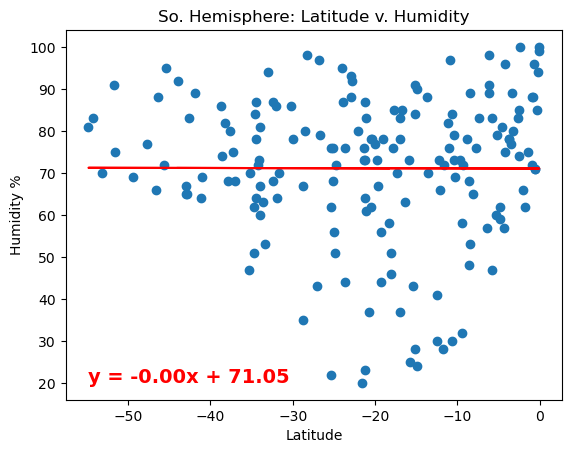

In [179]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Southern Hemisphere - Humidity
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Humidity']
x_label_south = "Latitude"
y_label_south = "Humidity %"
title_south = "So. Hemisphere: Latitude v. Humidity"

# Call the plot_linear_regression function for the Southern Hemisphere
plot_linear_regression(x_values_south, y_values_south, x_label_south, y_label_south, title_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

384
(0, 99)
78.2186
Index([  2,   3,   5,   6,   8,   9,  13,  14,  15,  16,
       ...
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556],
      dtype='int64', name='City_ID', length=384)


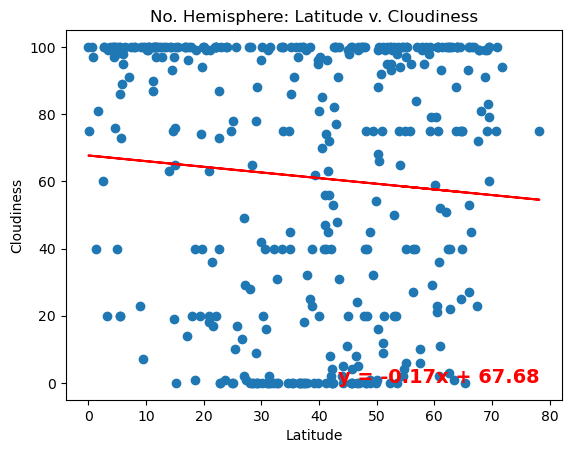

In [180]:
# Northern Hemisphere
# Northern Hemisphere - Humidity
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Cloudiness'] 
x_label_north = "Latitude"
y_label_north = "Cloudiness"
title_north = "No. Hemisphere: Latitude v. Cloudiness"

# Call the plot_linear_regression function for the Northern Hemisphere
plot_linear_regression(x_values_north, y_values_north, x_label_north, y_label_north, title_north)

174
(34, 0)
-54.8
Index([  0,   1,   4,   7,  10,  11,  12,  17,  18,  21,
       ...
       526, 527, 530, 534, 535, 538, 540, 543, 546, 557],
      dtype='int64', name='City_ID', length=174)


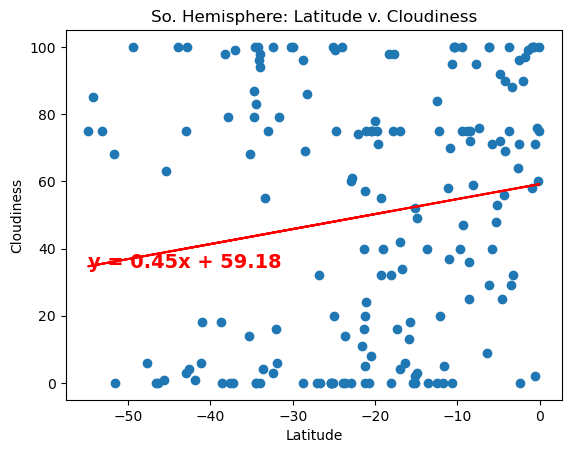

In [181]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Southern Hemisphere - Cloudiness
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Cloudiness']
x_label_south = "Latitude"
y_label_south = "Cloudiness"
title_south = "So. Hemisphere: Latitude v. Cloudiness"

# Call the plot_linear_regression function for the Southern Hemisphere
plot_linear_regression(x_values_south, y_values_south, x_label_south, y_label_south, title_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

384
(86, 99)
78.2186
Index([  2,   3,   5,   6,   8,   9,  13,  14,  15,  16,
       ...
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556],
      dtype='int64', name='City_ID', length=384)


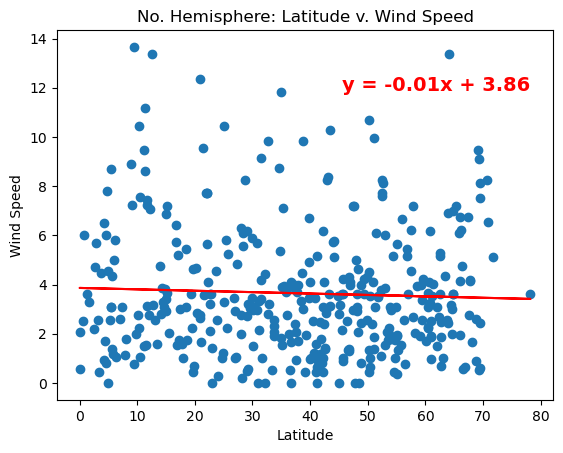

In [182]:
# Northern Hemisphere
# Northern Hemisphere - Wind Speed Regression
x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Wind Speed'] 
x_label_north = "Latitude"
y_label_north = "Wind Speed"
title_north = "No. Hemisphere: Latitude v. Wind Speed"

# Call the plot_linear_regression function for the Northern Hemisphere
plot_linear_regression(x_values_north, y_values_north, x_label_north, y_label_north, title_north)

174
(99, 99)
-0.0583
Index([  0,   1,   4,   7,  10,  11,  12,  17,  18,  21,
       ...
       526, 527, 530, 534, 535, 538, 540, 543, 546, 557],
      dtype='int64', name='City_ID', length=174)


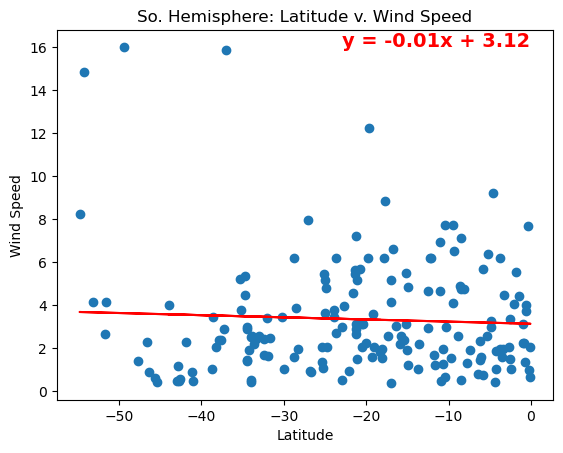

In [183]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Southern Hemisphere - Wind Speed
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Wind Speed']
x_label_south = "Latitude"
y_label_south = "Wind Speed"
title_south = "So. Hemisphere: Latitude v. Wind Speed" 

# Call the plot_linear_regression function for the Southern Hemisphere
plot_linear_regression(x_values_south, y_values_south, x_label_south, y_label_south, title_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE